In [ ]:
Investigating my grandparents blood pressure level via Python and Altair

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Investigating-my-grandparents-blood-pressure-level-via-Python-and-Altair" data-toc-modified-id="Investigating-my-grandparents-blood-pressure-level-via-Python-and-Altair-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Investigating my grandparents blood pressure level via Python and Altair</a></div><div class="lev3 toc-item"><a href="#Reasoning" data-toc-modified-id="Reasoning-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Reasoning</a></div><div class="lev3 toc-item"><a href="#TODO" data-toc-modified-id="TODO-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>TODO</a></div><div class="lev2 toc-item"><a href="#Transforming-the-dataframe" data-toc-modified-id="Transforming-the-dataframe-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Transforming the dataframe</a></div><div class="lev2 toc-item"><a href="#Testing-the-distribution" data-toc-modified-id="Testing-the-distribution-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Testing the distribution</a></div><div class="lev2 toc-item"><a href="#Visualizing-the-distribution" data-toc-modified-id="Visualizing-the-distribution-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualizing the distribution</a></div>

### Reasoning

My maternal grandparents are both quite old and have their share of health issues requiring constant monitoring.
We annotate daily both their blood pressure and pulse level and my grandma's blood-sugar level since she has diabetes.

All this data is unfortunately kept analogically by mere pen and paper, in order to ingest the data I have to manually copy the values into a Google spreadsheet
(as to make it readily available on the cloud) and then export is as a .csv file to analyze.

I have chosen Python, over R, as I want to get better at it, for the data visualization aspect 
I have chosen [**Altair**](https://altair-viz.github.io/index.html) since I like its declarative style and its novelty make me want to try and master it

As of now I am interested in exploring the data, once I collect more precise information on their medication I would like to try my hand at some machine learning training

**2017-05-28:** As of today I only have my grandpa data for the 2017

### TODO
- add more data on pressure [insert values for 2016]
- see if there's a way to normalize the dimensions of the histogram
- add more data on blood-pressure drugs taken daily as to check for a correlation
- Change the color of the type
- Rearrange the level the position of the histograms
- Add an horizontal line representing the threshold-risk value

In [14]:
import pandas as pd
import altair

In [15]:
DATA_URL = 'https://docs.google.com/spreadsheets/d/1r2YybTa9dCHZWz9NvTI3zN4pfthryyJAvjG2BPoOwr8/pub?gid=0&single=true&output=csv'  # Now it will be easy to access
df_raw = pd.read_csv(DATA_URL)
df_raw.drop(['medication', 'lasix'], axis=1, inplace=True)  # Until I have more information on its medication and lasix intake I am not factoring in these
df_raw.dropna(inplace=True)  # Some value are missing, we will drop them

## Transforming the dataframe
Note how our dataframe would not allow for multiple simultaneous representations. However we can Pivot it to obtain a df we can work with.

In [16]:
df = pd.melt(df_raw, id_vars=['date'], value_vars=['systolic', 'diastolic', 'pulse'], var_name='type', value_name='measurement')

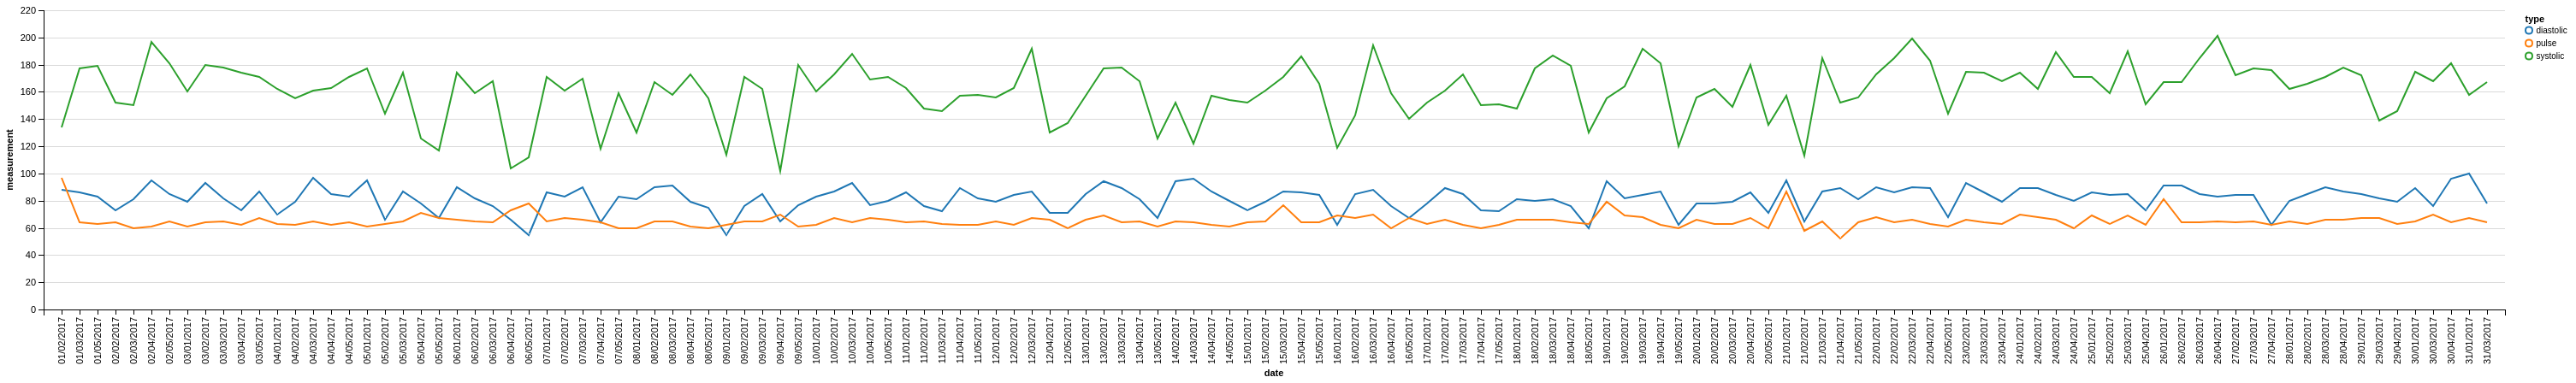

In [31]:
chart = altair.Chart(df).mark_line().encode(
        x = 'date', y = 'measurement', color='type'
    )
chart.configure_cell(height=350)

In [18]:
systolic = df[df['type'] == 'systolic'].drop(['type'], axis=1)
systolic.name = 'Systolic Pressure'
print(systolic.mean())
print(systolic.std())

measurement    161.367647
dtype: float64
measurement    20.298443
dtype: float64


In [19]:
diastolic = df[df['type'] == 'diastolic'].drop(['type'], axis=1)
diastolic.name = 'Diastolic Pressure'
print(diastolic.mean())
print(diastolic.std())

measurement    81.536765
dtype: float64
measurement    8.949991
dtype: float64


In [20]:
pulse = df[df['type'] == 'pulse'].drop(['type'], axis=1)
pulse.name = 'Pulse'
print(pulse.mean())
print(pulse.std())

measurement    65.139706
dtype: float64
measurement    5.045237
dtype: float64


## Testing the distribution

In [21]:
from scipy.stats import normaltest

We now construct a function to test whether the pressure is normally distributed or not. 

**Note on `scipy.stats.normaltest`:**

> Tests whether a sample differs from a normal distribution.
>
This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s [R614], [R615] test that combines skew and kurtosis to produce an omnibus test of normality.
>
[Source](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.normaltest.html) 

In [22]:
def is_normally_distributed(array):
    '''
    We pass the "polished" dataframe for both type  of pressure (and pulse),
    we then apply the normaltest function on the pressure column
    '''
    _, p = normaltest(array['measurement'])  # I am interested only in the p-value
    print(p)
    if p < 0.055:  # P value treshold to test the null hypothesis
        print('Normally Distributed\n')
    else:
        print('Not normally distributed\n') 

In [23]:
measurements_type = [systolic, diastolic, pulse]

for i in measurements_type:
    print(i.name)
    is_normally_distributed(i)

Systolic Pressure
0.000837359797293
Normally Distributed

Diastolic Pressure
0.00303140068803
Normally Distributed

Pulse
2.76374279722e-25
Normally Distributed



## Visualizing the distribution

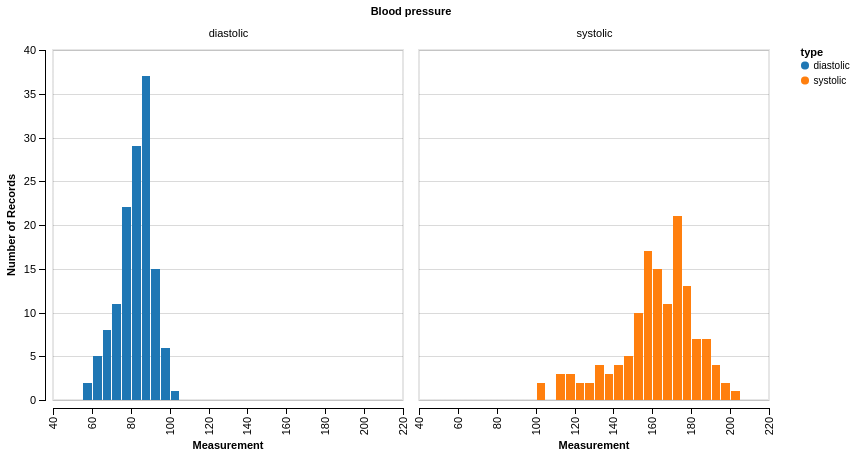

In [24]:
c = altair.Chart(df[df['type']!='pulse']).mark_bar().encode(
    altair.X('measurement', bin=altair.Bin(step=5), title='Measurement'),  # I choose step=5 to have a better representation of the distribution especially fot Max and Medium Pressure
    altair.Y('*', aggregate='count', type='quantitative'),
    color='type',
    column=altair.Column('type',
                  title='Blood pressure')
)
c.configure_cell(height=350, width=350)